In [183]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

Housing_info = pd.read_csv("House_Data_Cleaned.csv")

In [184]:
Housing_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Columns: 222 entries, Id to SaleCondition_Partial
dtypes: float64(1), int64(221)
memory usage: 2.5 MB


In [185]:
Housing_Data=Housing_info.drop(['Id'], axis=1)
Housing_Data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,60,62.0,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1453,20,85.0,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1454,70,66.0,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1455,20,68.0,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [186]:
Housing_Data.head(50)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,50,85.0,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,20,75.0,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,60,80.0,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,50,51.0,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,190,50.0,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0


In [187]:
Housing_Data.tail(50)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1407,60,79.0,12420,7,5,2001,2001,666,0,278,...,0,0,0,1,0,0,0,0,1,0
1408,50,80.0,9600,6,8,1950,2005,120,0,736,...,0,0,0,1,0,0,0,0,1,0
1409,90,60.0,7200,4,5,1949,1950,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1410,20,88.0,10994,8,5,2005,2006,976,0,868,...,0,0,0,0,1,0,0,0,0,0
1411,50,64.0,13053,6,7,1923,2000,0,0,833,...,0,0,0,1,0,0,0,0,1,0
1412,120,51.0,3635,7,5,2007,2007,988,0,398,...,0,0,0,1,0,0,0,0,1,0
1413,190,60.0,11340,4,6,1885,1950,0,0,777,...,0,0,0,1,0,0,0,0,1,0
1414,60,90.5,16545,8,5,1998,1998,781,0,503,...,0,0,0,1,0,0,0,0,1,0
1415,20,71.0,9204,5,5,1963,1963,25,872,247,...,0,0,0,0,0,0,0,0,1,0
1416,20,79.5,16381,6,5,1969,1969,1110,0,734,...,0,0,0,1,0,0,0,0,1,0


In [188]:
Housing_Data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,...,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,56.877145,69.757035,10460.434454,6.094715,5.576527,1971.194235,1984.818806,439.128346,46.645161,567.222375,...,0.003432,0.082361,0.002059,0.868909,0.069321,0.002745,0.008236,0.013727,0.821551,0.084420
std,42.339638,21.557280,9862.564977,1.376542,1.113638,30.190353,20.640669,432.964939,161.471529,442.212926,...,0.058500,0.275008,0.045345,0.337616,0.254086,0.052342,0.090410,0.116395,0.383022,0.278112
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7540.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,70.000000,9473.000000,6.000000,5.000000,1972.000000,1994.000000,383.000000,0.000000,479.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,712.000000,0.000000,808.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2188.000000,1474.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [189]:
#Defining the target and the predictor variables
Sale_price=Housing_Data[['SalePrice']].copy()
Sale_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1457 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [190]:
Sale_price.describe() #mean sale price is $180942.13 for 1457 houses

,SalePrice
count,1457.000000
mean,180942.138641
std,79521.569966
min,34900.000000
25%,129900.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [191]:
predictors=Housing_Data.drop('SalePrice', axis=1)
predictors.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,...,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,56.877145,69.757035,10460.434454,6.094715,5.576527,1971.194235,1984.818806,439.128346,46.645161,567.222375,...,0.003432,0.082361,0.002059,0.868909,0.069321,0.002745,0.008236,0.013727,0.821551,0.084420
std,42.339638,21.557280,9862.564977,1.376542,1.113638,30.190353,20.640669,432.964939,161.471529,442.212926,...,0.058500,0.275008,0.045345,0.337616,0.254086,0.052342,0.090410,0.116395,0.383022,0.278112
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7540.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,70.000000,9473.000000,6.000000,5.000000,1972.000000,1994.000000,383.000000,0.000000,479.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,712.000000,0.000000,808.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2188.000000,1474.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [192]:
Housing_Data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.394985,-0.142020,0.032830,-0.059092,0.027340,0.040121,-0.074087,-0.065524,-0.140678,...,0.014035,-0.045729,-0.014535,0.026596,0.005133,0.016268,0.030049,0.001039,0.024482,-0.051671
LotFrontage,-0.394985,1.000000,0.305024,0.222249,-0.036717,0.109679,0.079338,0.154541,0.049207,0.127081,...,-0.052166,0.098839,-0.023377,-0.069257,-0.015543,-0.037147,-0.015007,0.015837,-0.056660,0.097475
LotArea,-0.142020,0.305024,1.000000,0.091372,-0.002749,0.007523,0.007558,0.175331,0.114286,-0.003273,...,-0.014902,0.001166,-0.005537,0.012555,-0.027948,-0.013081,0.009605,-0.010247,0.018220,0.004069
OverallQual,0.032830,0.222249,0.091372,1.000000,-0.090753,0.572382,0.550751,0.222040,-0.058496,0.308849,...,-0.021097,0.318649,-0.058142,-0.217108,-0.103223,-0.041741,-0.044903,-0.025267,-0.135962,0.314583
OverallCond,-0.059092,-0.036717,-0.002749,-0.090753,1.000000,-0.375368,0.075033,-0.043367,0.039936,-0.136891,...,-0.019847,-0.155149,-0.050725,0.162791,-0.046674,-0.038955,-0.033550,-0.024006,0.160851,-0.150600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.016268,-0.037147,-0.013081,-0.041741,-0.038955,-0.045539,-0.040225,-0.015138,-0.015162,-0.034625,...,-0.003079,-0.015719,-0.002383,0.020380,-0.014320,1.000000,-0.004781,-0.006190,-0.112579,-0.015932
SaleCondition_Alloca,0.030049,-0.015007,0.009605,-0.044903,-0.033550,-0.009897,-0.020546,0.023484,-0.026334,-0.059141,...,-0.005348,-0.027301,-0.004139,0.035396,-0.024871,-0.004781,1.000000,-0.010751,-0.195532,-0.027671
SaleCondition_Family,0.001039,0.015837,-0.010247,-0.025267,-0.024006,-0.035550,-0.047849,0.002037,-0.007999,0.021544,...,-0.006923,-0.035344,-0.005359,0.028346,-0.032197,-0.006190,-0.010751,1.000000,-0.253132,-0.035823
SaleCondition_Normal,0.024482,-0.056660,0.018220,-0.135962,0.160851,-0.156000,-0.118159,0.003509,0.040586,-0.153634,...,0.027349,-0.642814,-0.097463,0.631588,-0.585587,-0.112579,-0.195532,-0.253132,1.000000,-0.651531


In [193]:
#Setting up pandas for ANCOVA analysis-since our dependent variable is continous and independent variable is a mix of both continous and categorical
#vars
import statsmodels.api as sm


In [194]:
#Normal Generalized Least Squares Model
gls_model = sm.GLS(Sale_price, predictors)
gls_results = gls_model.fit()
gls_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            GLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     86.64
Date:                Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:31:53   Log-Likelihood:                -16589.
No. Observations:                1457   AIC:                         3.356e+04
Df Residuals:                    1267   BIC:                         3.456e+04
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass                7.1564     81.343      0.088      0.930    -152.425     166.738
LotFrontage              91.5294     43.489      2.105      0.036       6.211     176.848
LotArea                   0.7430      0.105      7.101      0.000       0.538       0.948
OverallQual            7486.5363    973.087      7.694      0.000    5577.497    9395.576
OverallCond            5618.0249    833.582      6.740      0.000    3982.672    7253.377
YearBuilt               371.0268     70.345      5.274      0.000     233.022     509.032
YearRemodAdd            105.4599     52.984      1.990      0.047       1.515     209.405
BsmtFinSF1               19.0101      1.977      9.616      0.000      15.132      22.889
BsmtFinSF2                5.5192      3.290      1.678      0.094      -0.935      11.973
BsmtUnfSF                -3.6827      1.895     -1.943      0.052      -7.401       0.036
TotalBsmtSF              20.8464      2.998      6.954      0.000      14.966      26.727
1stFlrSF                 18.4611      5.752      3.209      0.001       7.176      29.746
2ndFlrSF                 35.2656      5.163      6.830      0.000      25.136      45.395
LowQualFinSF            -12.3561     13.105     -0.943      0.346     -38.065      13.353
GrLivArea                41.3711      5.261      7.864      0.000      31.050      51.692
BsmtFullBath           1038.3379   1873.612      0.554      0.580   -2637.386    4714.062
BsmtHalfBath            227.5479   2965.647      0.077      0.939   -5590.572    6045.667
FullBath               2078.1328   2138.531      0.972      0.331   -2117.319    6273.585
HalfBath               -599.3097   2037.330     -0.294      0.769   -4596.221    3397.602
BedroomAbvGr          -6427.2069   1320.182     -4.868      0.000   -9017.191   -3837.223
KitchenAbvGr          -1.625e+04   5492.630     -2.958      0.003    -2.7e+04   -5472.669
TotRmsAbvGrd            969.5454    928.997      1.044      0.297    -852.997    2792.088
Fireplaces             1859.4668   1309.728      1.420      0.156    -710.007    4428.940
GarageCars             5346.2810   2121.142      2.520      0.012    1184.944    9507.618
GarageArea                6.4629      7.303      0.885      0.376      -7.864      20.790
WoodDeckSF               13.7785      5.675      2.428      0.015       2.646      24.911
OpenPorchSF              22.6963     11.308      2.007      0.045       0.511      44.881
EnclosedPorch             4.7947     12.239      0.392      0.695     -19.217      28.807
3SsnPorch                19.0906     22.043      0.866      0.387     -24.155      62.336
ScreenPorch              35.9987     11.991      3.002      0.003      12.474      59.524
PoolArea                 63.7816     17.472      3.650      0.000      29.504      98.059
MiscVal                

In [195]:
#Generalized Least Square Autoregressive Model with lag 1
House_price_model = sm.GLSAR(Sale_price, predictors, 1)
House_price_model_results = House_price_model.iterative_fit(1)
print(House_price_model_results.summary())

                           GLSAR Regression Results                           
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                          GLSAR   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     86.56
Date:                Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:32:00   Log-Likelihood:                -16578.
No. Observations:                1456   AIC:                         3.354e+04
Df Residuals:                    1266   BIC:                         3.454e+04
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass                7.24

In [196]:
#Generalized Least Square Autoregressive Model with lag 1
House_price_model = sm.GLSAR(Sale_price, predictors, 1)
House_price_model_results = House_price_model.iterative_fit(1)
House_price_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                          GLSAR   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     86.56
Date:                Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:32:04   Log-Likelihood:                -16578.
No. Observations:                1456   AIC:                         3.354e+04
Df Residuals:                    1266   BIC:                         3.454e+04
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass                7.2458     81.376      0.089      0.929    -152.401     166.893
LotFrontage              91.4297     43.511      2.101      0.036       6.069     176.791
LotArea                   0.7430      0.105      7.099      0.000       0.538       0.948
OverallQual            7487.8525    973.501      7.692      0.000    5578.000    9397.705
OverallCond            5616.9595    833.933      6.736      0.000    3980.917    7253.002
YearBuilt               371.0784     70.373      5.273      0.000     233.018     509.138
YearRemodAdd            105.4521     53.004      1.990      0.047       1.467     209.438
BsmtFinSF1               19.0122      1.978      9.613      0.000      15.132      22.892
BsmtFinSF2                5.5158      3.291      1.676      0.094      -0.941      11.972
BsmtUnfSF                -3.6860      1.896     -1.944      0.052      -7.406       0.034
TotalBsmtSF              20.8422      2.999      6.950      0.000      14.959      26.725
1stFlrSF                 18.4607      5.754      3.208      0.001       7.172      29.750
2ndFlrSF                 35.2650      5.165      6.827      0.000      25.131      45.398
LowQualFinSF            -12.3644     13.110     -0.943      0.346     -38.084      13.355
GrLivArea                41.3616      5.263      7.859      0.000      31.036      51.687
BsmtFullBath           1045.6473   1874.950      0.558      0.577   -2632.704    4723.999
BsmtHalfBath            231.9533   2966.932      0.078      0.938   -5588.692    6052.598
FullBath               2084.9223   2139.821      0.974      0.330   -2113.064    6282.908
HalfBath               -594.5014   2038.361     -0.292      0.771   -4593.438    3404.435
BedroomAbvGr          -6431.9997   1321.067     -4.869      0.000   -9023.721   -3840.278
KitchenAbvGr          -1.625e+04   5494.823     -2.958      0.003    -2.7e+04   -5472.686
TotRmsAbvGrd            974.6078    929.951      1.048      0.295    -849.807    2799.022
Fireplaces             1854.5689   1310.628      1.415      0.157    -716.673    4425.811
GarageCars             5345.8365   2121.962      2.519      0.012    1182.887    9508.786
GarageArea                6.4583      7.306      0.884      0.377      -7.874      20.791
WoodDeckSF               13.7531      5.679      2.422      0.016       2.611      24.895
OpenPorchSF              22.6932     11.313      2.006      0.045       0.500      44.887
EnclosedPorch             4.7904     12.244      0.391      0.696     -19.231      28.812
3SsnPorch                19.0897     22.052      0.866      0.387     -24.173      62.352
ScreenPorch              35.9949     11.996      3.001      0.003      12.461      59.529
PoolArea                 63.7871     17.479      3.649      0.000      29.496      98.078
MiscVal                

In [197]:
#OLS
House_price_mod=sm.OLS(Sale_price, predictors).fit()
House_price_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     86.64
Date:                Sat, 08 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:32:08   Log-Likelihood:                -16589.
No. Observations:                1457   AIC:                         3.356e+04
Df Residuals:                    1267   BIC:                         3.456e+04
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass                7.1564     81.343      0.088      0.930    -152.425     166.738
LotFrontage              91.5294     43.489      2.105      0.036       6.211     176.848
LotArea                   0.7430      0.105      7.101      0.000       0.538       0.948
OverallQual            7486.5363    973.087      7.694      0.000    5577.497    9395.576
OverallCond            5618.0249    833.582      6.740      0.000    3982.672    7253.377
YearBuilt               371.0268     70.345      5.274      0.000     233.022     509.032
YearRemodAdd            105.4599     52.984      1.990      0.047       1.515     209.405
BsmtFinSF1               19.0101      1.977      9.616      0.000      15.132      22.889
BsmtFinSF2                5.5192      3.290      1.678      0.094      -0.935      11.973
BsmtUnfSF                -3.6827      1.895     -1.943      0.052      -7.401       0.036
TotalBsmtSF              20.8464      2.998      6.954      0.000      14.966      26.727
1stFlrSF                 18.4611      5.752      3.209      0.001       7.176      29.746
2ndFlrSF                 35.2656      5.163      6.830      0.000      25.136      45.395
LowQualFinSF            -12.3561     13.105     -0.943      0.346     -38.065      13.353
GrLivArea                41.3711      5.261      7.864      0.000      31.050      51.692
BsmtFullBath           1038.3379   1873.612      0.554      0.580   -2637.386    4714.062
BsmtHalfBath            227.5479   2965.647      0.077      0.939   -5590.572    6045.667
FullBath               2078.1328   2138.531      0.972      0.331   -2117.319    6273.585
HalfBath               -599.3097   2037.330     -0.294      0.769   -4596.221    3397.602
BedroomAbvGr          -6427.2069   1320.182     -4.868      0.000   -9017.191   -3837.223
KitchenAbvGr          -1.625e+04   5492.630     -2.958      0.003    -2.7e+04   -5472.669
TotRmsAbvGrd            969.5454    928.997      1.044      0.297    -852.997    2792.088
Fireplaces             1859.4668   1309.728      1.420      0.156    -710.007    4428.940
GarageCars             5346.2810   2121.142      2.520      0.012    1184.944    9507.618
GarageArea                6.4629      7.303      0.885      0.376      -7.864      20.790
WoodDeckSF               13.7785      5.675      2.428      0.015       2.646      24.911
OpenPorchSF              22.6963     11.308      2.007      0.045       0.511      44.881
EnclosedPorch             4.7947     12.239      0.392      0.695     -19.217      28.807
3SsnPorch                19.0906     22.043      0.866      0.387     -24.155      62.336
ScreenPorch              35.9987     11.991      3.002      0.003      12.474      59.524
PoolArea                 63.7816     17.472      3.650      0.000      29.504      98.059
MiscVal                

In [198]:
#Imports for setting up VIFS in python
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [199]:
#printing Variance Inflation Factor for covariates
# For each covariate, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns


C:\Users\emmao\.vscode\ANACONDA\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [200]:
#Checking out the VIF values
vif.round(1).head(50)

,VIF Factor,features
0,33.1,MSSubClass
1,2.5,LotFrontage
2,3.0,LotArea
3,5.0,OverallQual
4,2.4,OverallCond
5,12.6,YearBuilt
6,3.3,YearRemodAdd
7,inf,BsmtFinSF1
8,inf,BsmtFinSF2
9,inf,BsmtUnfSF


In [201]:
#Checking out the VIF values
vif.round(1).tail(50)

,VIF Factor,features
170,inf,Foundation_Slab
171,inf,Foundation_Stone
172,inf,Foundation_Wood
173,inf,Heating_Floor
174,inf,Heating_GasA
175,inf,Heating_GasW
176,inf,Heating_Grav
177,inf,Heating_OthW
178,inf,Heating_Wall
179,inf,HeatingQC_Ex


In [202]:
Housing_Data.head(50)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,50,85.0,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,20,75.0,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,60,80.0,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,50,51.0,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,190,50.0,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0


In [203]:
Housing_Data.info

<bound method DataFrame.info of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1452          60         62.0     7917            6            5       1999   
1453          20         85.0    13175            6            6       1978   
1454          70         66.0     9042            7            9       1941   
1455          20         68.0     9717            5            6       1950   
1456          20         75.0     9937            5            6       1965   

      YearRemodAdd 

In [204]:
vif.info

<bound method DataFrame.info of      VIF Factor               features
0     33.089764             MSSubClass
1      2.451935            LotFrontage
2      2.970496                LotArea
3      5.005466            OverallQual
4      2.404067            OverallCond
..          ...                    ...
215         inf  SaleCondition_AdjLand
216         inf   SaleCondition_Alloca
217         inf   SaleCondition_Family
218         inf   SaleCondition_Normal
219         inf  SaleCondition_Partial

[220 rows x 2 columns]>

In [205]:
#Deleting all observations(variables) in the VIF if VIF =='inf' and vif>5
Un_selected_variables = vif[ (vif['VIF Factor'] >= 5) & (vif['VIF Factor']=='inf') ].index

C:\Users\emmao\.vscode\ANACONDA\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [209]:
vif.drop(Un_selected_variables, inplace=True)

In [207]:
New_vif=vif.drop(Un_selected_variables, inplace=True)
vif.head(50)

,VIF Factor,features
0,33.089764,MSSubClass
1,2.451935,LotFrontage
2,2.970496,LotArea
3,5.005466,OverallQual
4,2.404067,OverallCond
5,12.582332,YearBuilt
6,3.336507,YearRemodAdd
7,inf,BsmtFinSF1
8,inf,BsmtFinSF2
9,inf,BsmtUnfSF


In [208]:
vif.drop(vif[vif['VIF Factor'] >=5].index, inplace = True)
vif.head(50)

,VIF Factor,features
1,2.451935,LotFrontage
2,2.970496,LotArea
4,2.404067,OverallCond
6,3.336507,YearRemodAdd
15,2.622281,BsmtFullBath
16,1.401326,BsmtHalfBath
17,3.858840,FullBath
18,2.925276,HalfBath
19,3.242229,BedroomAbvGr
20,4.094078,KitchenAbvGr


In [210]:
vif.drop(vif[vif['VIF Factor'] =='inf'].index, inplace = True)
vif.head(50)

C:\Users\emmao\.vscode\ANACONDA\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,VIF Factor,features
1,2.451935,LotFrontage
2,2.970496,LotArea
4,2.404067,OverallCond
6,3.336507,YearRemodAdd
15,2.622281,BsmtFullBath
16,1.401326,BsmtHalfBath
17,3.858840,FullBath
18,2.925276,HalfBath
19,3.242229,BedroomAbvGr
20,4.094078,KitchenAbvGr


In [211]:
vif.info

<bound method DataFrame.info of     VIF Factor       features
1     2.451935    LotFrontage
2     2.970496        LotArea
4     2.404067    OverallCond
6     3.336507   YearRemodAdd
15    2.622281   BsmtFullBath
16    1.401326   BsmtHalfBath
17    3.858840       FullBath
18    2.925276       HalfBath
19    3.242229   BedroomAbvGr
20    4.094078   KitchenAbvGr
22    1.972446     Fireplaces
25    1.412458     WoodDeckSF
26    1.522310    OpenPorchSF
27    1.563938  EnclosedPorch
28    1.167475      3SsnPorch
29    1.249460    ScreenPorch
30    1.244242       PoolArea
31    1.344895        MiscVal
32    1.191198         MoSold
33    1.231766         YrSold>

In [212]:
vif.describe()

,VIF Factor
count,20.000000
mean,2.160361
std,0.968777
min,1.167475
25%,1.321036
50%,1.768192
75%,2.936581
max,4.094078


In [213]:
vif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 33
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VIF Factor  20 non-null     float64
 1   features    20 non-null     object 
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [214]:
predictors.head(50)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,50,85.0,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,20,75.0,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,60,80.0,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,50,51.0,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,190,50.0,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0


In [215]:
#Running a OLS regression with selected variables whose VIF<5
New_predictors = predictors[['LotFrontage', 'LotArea', 'OverallCond','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']].copy()

In [216]:
#Checking the df prdictors to make sure that column names are in order
for col_name in predictors:
    print(col_name)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
N

In [217]:
New_predictors.head(50)

,LotFrontage,LotArea,OverallCond,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,5,2003,1,0,2,1,3,1,0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,8,1976,0,1,2,0,3,1,1,298,0,0,0,0,0,0,5,2007
2,68.0,11250,5,2002,1,0,2,1,3,1,1,0,42,0,0,0,0,0,9,2008
3,60.0,9550,5,1970,1,0,1,0,3,1,1,0,35,272,0,0,0,0,2,2006
4,84.0,14260,5,2000,1,0,2,1,4,1,1,192,84,0,0,0,0,0,12,2008
5,85.0,14115,5,1995,1,0,1,1,1,1,0,40,30,0,320,0,0,700,10,2009
6,75.0,10084,5,2005,1,0,2,0,3,1,1,255,57,0,0,0,0,0,8,2007
7,80.0,10382,6,1973,1,0,2,1,3,1,2,235,204,228,0,0,0,350,11,2009
8,51.0,6120,5,1950,0,0,2,0,2,2,2,90,0,205,0,0,0,0,4,2008
9,50.0,7420,6,1950,1,0,1,0,2,2,2,0,4,0,0,0,0,0,1,2008


In [218]:
#Re running the OLS Model to find out the predictors of Home saleprices in Ames, Iowa, after solving the diagnosic problem of multicollinearity in the dataset
#OLS
House_price_model_new=sm.OLS(Sale_price, New_predictors).fit()
House_price_model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              1149.
Date:                Sat, 08 Aug 2020   Prob (F-statistic):                        0.00
Time:                        14:33:15   Log-Likelihood:                         -17771.
No. Observations:                1457   AIC:                                  3.558e+04
Df Residuals:                    1437   BIC:                                  3.569e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotFrontage     680.8389     65.215     10.440      0.000     552.912     808.765
LotArea           0.5703      0.140      4.060      0.000       0.295       0.846
OverallCond    -755.3954   1216.438     -0.621      0.535   -3141.580    1630.789
YearRemodAdd    906.3006     77.290     11.726      0.000     754.687    1057.914
BsmtFullBath   2.227e+04   2650.771      8.402      0.000    1.71e+04    2.75e+04
BsmtHalfBath   3205.9486   5450.303      0.588      0.556   -7485.454    1.39e+04
FullBath       4.956e+04   3162.987     15.670      0.000    4.34e+04    5.58e+04
HalfBath       1.951e+04   2755.892      7.081      0.000    1.41e+04    2.49e+04
BedroomAbvGr  -3259.0041   1873.803     -1.739      0.082   -6934.687     416.678
KitchenAbvGr  -2.924e+04   6162.169     -4.745      0.000   -4.13e+04   -1.72e+04
Fireplaces     2.499e+04   2249.285     11.112      0.000    2.06e+04    2.94e+04
WoodDeckSF       63.9607     10.924      5.855      0.000      42.531      85.390
OpenPorchSF      94.7734     20.729      4.572      0.000      54.111     135.436
EnclosedPorch     9.5170     21.547      0.442      0.659     -32.750      51.784
3SsnPorch        22.2474     43.542      0.511      0.609     -63.165     107.660
ScreenPorch      85.6344     23.616      3.626      0.000      39.310     131.959
PoolArea         61.3754     33.589      1.827      0.068      -4.514     127.264
MiscVal          -1.4912      2.567     -0.581      0.561      -6.527       3.545
MoSold          125.8437    472.055      0.267      0.790    -800.146    1051.834
YrSold         -871.5516     75.534    -11.538      0.000   -1019.721    -723.382
==============================================================================
Omnibus:                      638.434   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5943.991
Skew:                           1.796   Prob(JB):                         0.00
Kurtosis:                      12.220   Cond. No.                     7.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
#Running a generalized least squares model with the cleaned dataset
#Normal Generalized Least Squares Model
gls_model2 = sm.GLS(Sale_price, New_predictors)
gls_results2 = gls_model2.fit()
gls_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.941
Model:                            GLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              1149.
Date:                Sat, 08 Aug 2020   Prob (F-statistic):                        0.00
Time:                        14:33:20   Log-Likelihood:                         -17771.
No. Observations:                1457   AIC:                                  3.558e+04
Df Residuals:                    1437   BIC:                                  3.569e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotFrontage     680.8389     65.215     10.440      0.000     552.912     808.765
LotArea           0.5703      0.140      4.060      0.000       0.295       0.846
OverallCond    -755.3954   1216.438     -0.621      0.535   -3141.580    1630.789
YearRemodAdd    906.3006     77.290     11.726      0.000     754.687    1057.914
BsmtFullBath   2.227e+04   2650.771      8.402      0.000    1.71e+04    2.75e+04
BsmtHalfBath   3205.9486   5450.303      0.588      0.556   -7485.454    1.39e+04
FullBath       4.956e+04   3162.987     15.670      0.000    4.34e+04    5.58e+04
HalfBath       1.951e+04   2755.892      7.081      0.000    1.41e+04    2.49e+04
BedroomAbvGr  -3259.0041   1873.803     -1.739      0.082   -6934.687     416.678
KitchenAbvGr  -2.924e+04   6162.169     -4.745      0.000   -4.13e+04   -1.72e+04
Fireplaces     2.499e+04   2249.285     11.112      0.000    2.06e+04    2.94e+04
WoodDeckSF       63.9607     10.924      5.855      0.000      42.531      85.390
OpenPorchSF      94.7734     20.729      4.572      0.000      54.111     135.436
EnclosedPorch     9.5170     21.547      0.442      0.659     -32.750      51.784
3SsnPorch        22.2474     43.542      0.511      0.609     -63.165     107.660
ScreenPorch      85.6344     23.616      3.626      0.000      39.310     131.959
PoolArea         61.3754     33.589      1.827      0.068      -4.514     127.264
MiscVal          -1.4912      2.567     -0.581      0.561      -6.527       3.545
MoSold          125.8437    472.055      0.267      0.790    -800.146    1051.834
YrSold         -871.5516     75.534    -11.538      0.000   -1019.721    -723.382
==============================================================================
Omnibus:                      638.434   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5943.991
Skew:                           1.796   Prob(JB):                         0.00
Kurtosis:                      12.220   Cond. No.                     7.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
#calculating the age of  the house using the formula yearremod-yearbuilt
Healthy_age_of_house=Housing_Data['YearRemodAdd']-Housing_Data['YearBuilt']
Healthy_age_of_house.head(50)

0      0
1      0
2      1
3     55
4      0
5      2
6      1
7      0
8     19
9     11
10     0
11     1
12     0
13     1
14     0
15    72
16     0
17     0
18     0
19     7
20     1
21    20
22     0
23     0
24    33
25     0
26    49
27     1
28    40
29    23
30    30
31    40
32     0
33     0
34     0
35     1
36     1
37    36
38    54
39     0
40     0
41     0
42     0
43     5
44     0
45     0
46     0
47     0
48    88
49     0
dtype: int64

In [221]:
#calculating the actual age of  the house using the formula yearsold-yearbuilt (at the time of sale)
Actual_age_of_house=Housing_Data['YrSold']-Housing_Data['YearBuilt']
Actual_age_of_house.head(50)

0      5
1     31
2      7
3     91
4      8
5     16
6      3
7     36
8     77
9     69
10    43
11     1
12    46
13     1
14    48
15    78
16    40
17    39
18     4
19    51
20     1
21    77
22     6
23    31
24    42
25     2
26    59
27     3
28    49
29    81
30    88
31    42
32     1
33    51
34     2
35     2
36    15
37    55
38    57
39    53
40    41
41    48
42    24
43    33
44    47
45     5
46     6
47     1
48    89
49    41
dtype: int64

In [222]:
#Appending the agesof houses in the new predictor variable
New_predictors['Healthy_age_of_house'] = Healthy_age_of_house
New_predictors['Actual_age_of_house']= Actual_age_of_house

In [223]:
New_predictors

,LotFrontage,LotArea,OverallCond,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Healthy_age_of_house,Actual_age_of_house
0,65.0,8450,5,2003,1,0,2,1,3,1,...,61,0,0,0,0,0,2,2008,0,5
1,80.0,9600,8,1976,0,1,2,0,3,1,...,0,0,0,0,0,0,5,2007,0,31
2,68.0,11250,5,2002,1,0,2,1,3,1,...,42,0,0,0,0,0,9,2008,1,7
3,60.0,9550,5,1970,1,0,1,0,3,1,...,35,272,0,0,0,0,2,2006,55,91
4,84.0,14260,5,2000,1,0,2,1,4,1,...,84,0,0,0,0,0,12,2008,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,62.0,7917,5,2000,0,0,2,1,3,1,...,40,0,0,0,0,0,8,2007,1,8
1453,85.0,13175,6,1988,1,0,2,0,3,1,...,0,0,0,0,0,0,2,2010,10,32
1454,66.0,9042,9,2006,0,0,2,0,4,1,...,60,0,0,0,0,2500,5,2010,65,69
1455,68.0,9717,6,1996,1,0,1,0,2,1,...,0,112,0,0,0,0,4,2010,46,60


In [224]:
#Running the model again with age of the house
House_price_model_new2=sm.OLS(Sale_price, New_predictors).fit()
House_price_model_new2.summary()
#Interpretation of results
#1)LotFrontage: For every increase in the LotFrontage size of a house sold in Ames, the sale price of the house increases by $637.8, all else constant
#2)LotArea: For every increase in the LotArea size of a house sold in Ames, the sale price of the house increases by $0.65, all else constant
#3)Overall Condition: For an increase in the quality of the overall house condition in Ames, the sale price of the house increases by $3,981.4, all else constant
#4) Year RemodAdd: For every one unit increase in the number of years RemodAdd of a house sold in Ames, the sale price of the house increases by $439.4, all else constant
#5) Wooddeck, openporch, enclosed porch, screenporch: For every house with sold in Ames with the named attributes, the sale price of the house increases by $60.5,$101,$69.1, and $97.66 respectively, all else constant\
#6) Yrsold: For yearly increasesin the time of sale of houses in Ames, the sale price of the house reduced by $412.8, all else constant
#7) Healthy_age_of_house(length between the time when a house was first renovated and the time when it was built)
#For every one year increase from the time of home renovation in Ames, the price a house in Ames increased by $168.2

#8) ACtual_age_of_house (difference between Yrsold and YearBuilt): For every one year increase in the life of the house in Ames, the house sale price dropped by $684

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              1136.
Date:                Sat, 08 Aug 2020   Prob (F-statistic):                        0.00
Time:                        14:33:38   Log-Likelihood:                         -17744.
No. Observations:                1457   AIC:                                  3.553e+04
Df Residuals:                    1436   BIC:                                  3.564e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotFrontage            637.7766     64.328      9.915      0.000     511.590     763.963
LotArea                  0.6573      0.138      4.747      0.000       0.386       0.929
OverallCond           3981.4430   1359.323      2.929      0.003    1314.971    6647.915
YearRemodAdd           439.4038     38.589     11.387      0.000     363.706     515.101
BsmtFullBath          1.884e+04   2645.763      7.121      0.000    1.36e+04     2.4e+04
BsmtHalfBath           530.2180   5366.057      0.099      0.921   -9995.932    1.11e+04
FullBath              4.223e+04   3264.696     12.936      0.000    3.58e+04    4.86e+04
HalfBath              1.579e+04   2754.547      5.732      0.000    1.04e+04    2.12e+04
BedroomAbvGr          -902.2988   1868.577     -0.483      0.629   -4567.731    2763.133
KitchenAbvGr         -1.954e+04   6196.729     -3.153      0.002   -3.17e+04   -7381.743
Fireplaces            2.525e+04   2209.631     11.427      0.000    2.09e+04    2.96e+04
WoodDeckSF              60.5109     10.741      5.634      0.000      39.441      81.580
OpenPorchSF            101.0121     20.379      4.957      0.000      61.036     140.988
EnclosedPorch           69.1297     22.682      3.048      0.002      24.636     113.624
3SsnPorch               25.9923     42.772      0.608      0.543     -57.910     109.895
ScreenPorch             97.6583     23.255      4.200      0.000      52.042     143.275
PoolArea                62.3164     32.993      1.889      0.059      -2.403     127.036
MiscVal                 -2.0006      2.523     -0.793      0.428      -6.949       2.948
MoSold                 133.0410    463.676      0.287      0.774    -776.514    1042.596
YrSold                -412.8090     36.798    -11.218      0.000    -484.993    -340.625
Healthy_age_of_house   168.2055     53.247      3.159      0.002      63.754     272.657
Actual_age_of_house   -684.0073     49.807    -13.733      0.000    -781.710    -586.305
==============================================================================
Omnibus:                      709.218   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7604.475
Skew:                           2.002   Prob(JB):                         0.00
Kurtosis:                      13.451   Cond. No.                     7.96e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.85e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [225]:
#Running a generalized least squares model with the cleaned dataset
#Normal Generalized Least Squares Model
gls_model3 = sm.GLS(Sale_price, New_predictors)
gls_results3 = gls_model3.fit()
gls_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.943
Model:                            GLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              1136.
Date:                Sat, 08 Aug 2020   Prob (F-statistic):                        0.00
Time:                        14:33:43   Log-Likelihood:                         -17744.
No. Observations:                1457   AIC:                                  3.553e+04
Df Residuals:                    1436   BIC:                                  3.564e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotFrontage            637.7766     64.328      9.915      0.000     511.590     763.963
LotArea                  0.6573      0.138      4.747      0.000       0.386       0.929
OverallCond           3981.4430   1359.323      2.929      0.003    1314.971    6647.915
YearRemodAdd           439.4038     38.589     11.387      0.000     363.706     515.101
BsmtFullBath          1.884e+04   2645.763      7.121      0.000    1.36e+04     2.4e+04
BsmtHalfBath           530.2180   5366.057      0.099      0.921   -9995.932    1.11e+04
FullBath              4.223e+04   3264.696     12.936      0.000    3.58e+04    4.86e+04
HalfBath              1.579e+04   2754.547      5.732      0.000    1.04e+04    2.12e+04
BedroomAbvGr          -902.2988   1868.577     -0.483      0.629   -4567.731    2763.133
KitchenAbvGr         -1.954e+04   6196.729     -3.153      0.002   -3.17e+04   -7381.743
Fireplaces            2.525e+04   2209.631     11.427      0.000    2.09e+04    2.96e+04
WoodDeckSF              60.5109     10.741      5.634      0.000      39.441      81.580
OpenPorchSF            101.0121     20.379      4.957      0.000      61.036     140.988
EnclosedPorch           69.1297     22.682      3.048      0.002      24.636     113.624
3SsnPorch               25.9923     42.772      0.608      0.543     -57.910     109.895
ScreenPorch             97.6583     23.255      4.200      0.000      52.042     143.275
PoolArea                62.3164     32.993      1.889      0.059      -2.403     127.036
MiscVal                 -2.0006      2.523     -0.793      0.428      -6.949       2.948
MoSold                 133.0410    463.676      0.287      0.774    -776.514    1042.596
YrSold                -412.8090     36.798    -11.218      0.000    -484.993    -340.625
Healthy_age_of_house   168.2055     53.247      3.159      0.002      63.754     272.657
Actual_age_of_house   -684.0073     49.807    -13.733      0.000    -781.710    -586.305
==============================================================================
Omnibus:                      709.218   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7604.475
Skew:                           2.002   Prob(JB):                         0.00
Kurtosis:                      13.451   Cond. No.                     7.96e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.85e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [226]:
%matplotlib inline

from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt


In [227]:
#Model Diagnostics for second last model-test for normality of residuals
name_of_test = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(House_price_model_new2.resid)
lzip(name_of_test, test)

[('Jarque-Bera', 7604.474953807448),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 2.002218557553083),
 ('Kurtosis', 13.451169299839359)]

In [228]:
#Model Diagnostics for second last model-test for omni
name_of_test2 = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(House_price_model_new2.resid)
lzip(name_of_test2, test)

[('Chi^2', 709.217786696819), ('Two-tail probability', 9.892689654794938e-155)]

In [229]:
#Test of influence of model
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(House_price_model_new2)
test_class.dfbetas[:5,:]

array([[ 9.85194734e-04, -1.79981444e-04,  1.00251440e-03,
        -1.20224494e-03, -7.85993517e-03, -1.27856096e-03,
        -5.00815400e-03, -6.96956081e-03, -1.85440165e-04,
         2.35609366e-03,  6.79166561e-03,  6.05582058e-03,
         7.91943155e-04,  9.20890682e-04,  8.50809390e-04,
         1.04295969e-03,  1.59673259e-04, -1.79437458e-05,
         7.91703690e-03,  8.25442070e-04, -9.08212449e-04,
         5.70372813e-04],
       [-1.00673427e-02,  1.34373959e-02, -4.73002962e-02,
         3.07107523e-02,  6.00111219e-03, -6.67045833e-02,
        -2.54604140e-02,  1.25871507e-02,  1.02595687e-02,
        -1.21445686e-03, -6.04711332e-03, -2.44935392e-02,
         1.10715014e-02,  6.95051756e-04,  6.24077089e-03,
         5.89165448e-03,  5.22200498e-03,  3.01799116e-03,
         1.19728746e-02, -2.62429876e-02,  3.49570345e-02,
        -5.81096601e-03],
       [ 3.51212894e-03, -6.06571257e-04,  2.60220535e-03,
        -3.17391037e-03, -1.57452152e-02, -1.01350600e-03,
    

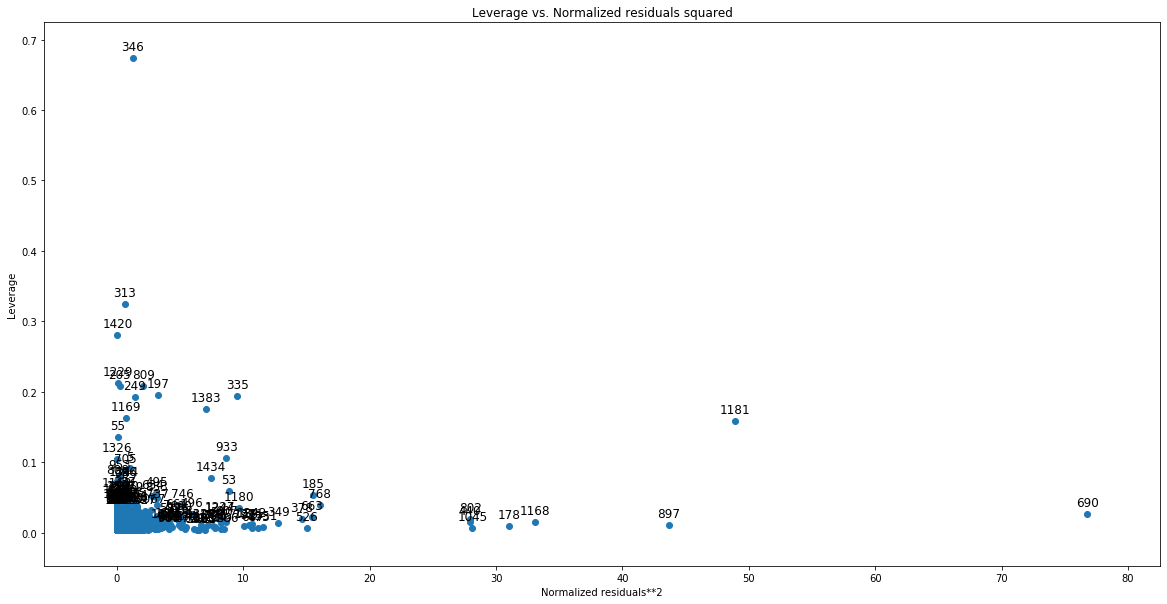

In [230]:
#Leverage vs normalized residuals
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(20,10))
fig = plot_leverage_resid2(House_price_model_new2, ax = ax)

In [231]:
#Multicollinearity test
np.linalg.cond(House_price_model_new2.model.exog)
#Since the resulting value is not close to zero, the problem of multicollinearity has been addressed, and so it is not present in our model.

7.958138328972725e+16

In [232]:
#Multicollinearity test continued
corr = np.corrcoef(New_predictors, rowvar=0)
w, v = np.linalg.eig(corr) 
w
#See comment above

array([ 3.06802464e+00,  1.91489168e+00,  1.52870100e+00,  1.41520986e+00,
        2.78666365e-01,  1.25314765e+00,  4.44927264e-01,  5.68629665e-01,
        1.14915235e+00,  6.15341279e-01,  6.51096939e-01,  1.09185385e+00,
        1.05630818e+00,  1.02737602e+00,  1.00426533e+00,  7.23160641e-01,
        9.31896377e-01,  8.82618506e-01,  7.76564265e-01,  8.20592133e-01,
        7.97576002e-01, -1.11210675e-16])

In [233]:
#Heteroscedasticity test (using the BP LM test)
name_of_diagnostic_test = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(House_price_model_new2.resid, House_price_model_new2.model.exog)
lzip(name_of_diagnostic_test, test)
#There is evidence that there are non constant error terms in our model(the error terms are heteroscedastic)

[('Lagrange multiplier statistic', 297.80707038607375),
 ('p-value', 8.885859656233779e-51),
 ('f-value', 17.567680563375642),
 ('f p-value', 1.9100231712367174e-57)]

In [234]:
#Transforming variables in our model to solve the problem of heteroscedasticity
Sale_price['LogSalePrice'] = np.log(Sale_price['SalePrice'])
Sale_price      

,SalePrice,LogSalePrice
0,208500,12.247694
1,181500,12.109011
2,223500,12.317167
3,140000,11.849398
4,250000,12.429216
...,...,...
1452,175000,12.072541
1453,210000,12.254863
1454,266500,12.493130
1455,142125,11.864462


In [235]:
New_predictors.head(50)

,LotFrontage,LotArea,OverallCond,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Healthy_age_of_house,Actual_age_of_house
0,65.0,8450,5,2003,1,0,2,1,3,1,...,61,0,0,0,0,0,2,2008,0,5
1,80.0,9600,8,1976,0,1,2,0,3,1,...,0,0,0,0,0,0,5,2007,0,31
2,68.0,11250,5,2002,1,0,2,1,3,1,...,42,0,0,0,0,0,9,2008,1,7
3,60.0,9550,5,1970,1,0,1,0,3,1,...,35,272,0,0,0,0,2,2006,55,91
4,84.0,14260,5,2000,1,0,2,1,4,1,...,84,0,0,0,0,0,12,2008,0,8
5,85.0,14115,5,1995,1,0,1,1,1,1,...,30,0,320,0,0,700,10,2009,2,16
6,75.0,10084,5,2005,1,0,2,0,3,1,...,57,0,0,0,0,0,8,2007,1,3
7,80.0,10382,6,1973,1,0,2,1,3,1,...,204,228,0,0,0,350,11,2009,0,36
8,51.0,6120,5,1950,0,0,2,0,2,2,...,0,205,0,0,0,0,4,2008,19,77
9,50.0,7420,6,1950,1,0,1,0,2,2,...,4,0,0,0,0,0,1,2008,11,69


In [236]:
#Transforming variables in our model to solve the problem of heteroscedasticity
New_predictors['LogLotFrontage'] = np.log(New_predictors['LotFrontage'])
New_predictors     

,LotFrontage,LotArea,OverallCond,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Healthy_age_of_house,Actual_age_of_house,LogLotFrontage
0,65.0,8450,5,2003,1,0,2,1,3,1,...,0,0,0,0,0,2,2008,0,5,4.174387
1,80.0,9600,8,1976,0,1,2,0,3,1,...,0,0,0,0,0,5,2007,0,31,4.382027
2,68.0,11250,5,2002,1,0,2,1,3,1,...,0,0,0,0,0,9,2008,1,7,4.219508
3,60.0,9550,5,1970,1,0,1,0,3,1,...,272,0,0,0,0,2,2006,55,91,4.094345
4,84.0,14260,5,2000,1,0,2,1,4,1,...,0,0,0,0,0,12,2008,0,8,4.430817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,62.0,7917,5,2000,0,0,2,1,3,1,...,0,0,0,0,0,8,2007,1,8,4.127134
1453,85.0,13175,6,1988,1,0,2,0,3,1,...,0,0,0,0,0,2,2010,10,32,4.442651
1454,66.0,9042,9,2006,0,0,2,0,4,1,...,0,0,0,0,2500,5,2010,65,69,4.189655
1455,68.0,9717,6,1996,1,0,1,0,2,1,...,112,0,0,0,0,4,2010,46,60,4.219508


In [237]:
#Transforming variables in our model to solve the problem of heteroscedasticity
New_predictors['LogLotArea'] = np.log(New_predictors['LotArea'])
New_predictors 

,LotFrontage,LotArea,OverallCond,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Healthy_age_of_house,Actual_age_of_house,LogLotFrontage,LogLotArea
0,65.0,8450,5,2003,1,0,2,1,3,1,...,0,0,0,0,2,2008,0,5,4.174387,9.041922
1,80.0,9600,8,1976,0,1,2,0,3,1,...,0,0,0,0,5,2007,0,31,4.382027,9.169518
2,68.0,11250,5,2002,1,0,2,1,3,1,...,0,0,0,0,9,2008,1,7,4.219508,9.328123
3,60.0,9550,5,1970,1,0,1,0,3,1,...,0,0,0,0,2,2006,55,91,4.094345,9.164296
4,84.0,14260,5,2000,1,0,2,1,4,1,...,0,0,0,0,12,2008,0,8,4.430817,9.565214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,62.0,7917,5,2000,0,0,2,1,3,1,...,0,0,0,0,8,2007,1,8,4.127134,8.976768
1453,85.0,13175,6,1988,1,0,2,0,3,1,...,0,0,0,0,2,2010,10,32,4.442651,9.486076
1454,66.0,9042,9,2006,0,0,2,0,4,1,...,0,0,0,2500,5,2010,65,69,4.189655,9.109636
1455,68.0,9717,6,1996,1,0,1,0,2,1,...,0,0,0,0,4,2010,46,60,4.219508,9.181632


In [238]:
#Target variable transformed values
Sale_price.drop(Sale_price.columns[[0]], axis = 1, inplace = True) 
Sale_price
  

,LogSalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1452,12.072541
1453,12.254863
1454,12.493130
1455,11.864462


In [239]:
New_predictors.drop(New_predictors.columns[[0,1]], axis = 1, inplace = True) 
New_predictors
  

,OverallCond,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Healthy_age_of_house,Actual_age_of_house,LogLotFrontage,LogLotArea
0,5,2003,1,0,2,1,3,1,0,0,...,0,0,0,0,2,2008,0,5,4.174387,9.041922
1,8,1976,0,1,2,0,3,1,1,298,...,0,0,0,0,5,2007,0,31,4.382027,9.169518
2,5,2002,1,0,2,1,3,1,1,0,...,0,0,0,0,9,2008,1,7,4.219508,9.328123
3,5,1970,1,0,1,0,3,1,1,0,...,0,0,0,0,2,2006,55,91,4.094345,9.164296
4,5,2000,1,0,2,1,4,1,1,192,...,0,0,0,0,12,2008,0,8,4.430817,9.565214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,5,2000,0,0,2,1,3,1,1,0,...,0,0,0,0,8,2007,1,8,4.127134,8.976768
1453,6,1988,1,0,2,0,3,1,2,349,...,0,0,0,0,2,2010,10,32,4.442651,9.486076
1454,9,2006,0,0,2,0,4,1,2,0,...,0,0,0,2500,5,2010,65,69,4.189655,9.109636
1455,6,1996,1,0,1,0,2,1,0,366,...,0,0,0,0,4,2010,46,60,4.219508,9.181632


In [240]:
#Run the model again and check for heteroscedastic errors
#Running the model again with age of the house
Model_with_adjusted_target=sm.OLS(Sale_price, New_predictors).fit()
Model_with_adjusted_target.summary()
#Interpretation of results
#1)LotFrontage: For every 20% increase in the LotFrontage size of a house sold in Ames, the sale price of the house increases by 2%, all else constant
#2)LotArea: For every 20% increase in the LotArea size of a house sold in Ames, the sale price of the house increases by 2.3%, all else constant
#2)Overall Condition: For an increase in the quality of the overall house condition in Ames, the sale price of the house increases by 5%, all else constant
#4) Year RemodAdd: For every one unit increase in the number of years RemodAdd of a house sold in Ames, the sale price of the house increases by 0.4%, all else constant
#5)BsmtFullBath: For every house with BSMFullBath sold in Ames, the sale price of the house increases by 10%, all else constant
#6):FullBath: For every house with FullBath sold in Ames, the sale price of the house increases by 22%, all else constant
#7) Bedroom & Kitchen (AboveGr): Bedroom(above ground) and Kitchen(aboveground)  attributes increased the house sale prices in Ames by 1.6% and reduced prices by 9.4% respectively
#8) Fireplaces, Wooddeck, openporch, enclosed porch, screenporch: For every house with sold in Ames with the named attributes, the sale price of the house increases by 13.76%,0.02%, 0.04%,0.04%, 0.05% respectively, all else constant\
#9) Yrsold: For yearly increasesin the time of sale of houses in Ames, the sale price of the house increases by 0.11%, all else constant
#10) Healthy_age_of_house(length between the time when a house was first renovated and the time when it was built)
#For every one year increase from the time of home renovation in Ames, the price a house in Ames reduced by 0.07%

#11) ACtual_age_of_house (difference between Yrsold and YearBuilt): For every one year increase in the life of the house in Ames, the house sale price dropped by 0.4%

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           LogSalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.572e+05
Date:                Sat, 08 Aug 2020   Prob (F-statistic):                        0.00
Time:                        14:37:21   Log-Likelihood:                          306.00
No. Observations:                1457   AIC:                                     -570.0
Df Residuals:                    1436   BIC:                                     -459.0
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
OverallCond              0.0480      0.006      8.470      0.000       0.037       0.059
YearRemodAdd             0.0039      0.000     24.105      0.000       0.004       0.004
BsmtFullBath             0.0956      0.011      8.694      0.000       0.074       0.117
BsmtHalfBath             0.0077      0.022      0.344      0.731      -0.036       0.052
FullBath                 0.1999      0.014     14.710      0.000       0.173       0.227
HalfBath                 0.0842      0.012      7.309      0.000       0.062       0.107
BedroomAbvGr             0.0159      0.008      2.011      0.044       0.000       0.031
KitchenAbvGr            -0.0900      0.026     -3.488      0.001      -0.141      -0.039
Fireplaces               0.1296      0.009     14.035      0.000       0.111       0.148
WoodDeckSF               0.0002    4.5e-05      4.814      0.000       0.000       0.000
OpenPorchSF              0.0004   8.51e-05      4.392      0.000       0.000       0.001
EnclosedPorch            0.0004   9.44e-05      4.665      0.000       0.000       0.001
3SsnPorch                0.0002      0.000      1.007      0.314      -0.000       0.001
ScreenPorch              0.0005    9.7e-05      5.168      0.000       0.000       0.001
PoolArea              8.836e-05      0.000      0.644      0.520      -0.000       0.000
MiscVal              -1.493e-05   1.05e-05     -1.420      0.156   -3.56e-05     5.7e-06
MoSold                   0.0024      0.002      1.242      0.214      -0.001       0.006
YrSold                   0.0011      0.000      6.684      0.000       0.001       0.001
Healthy_age_of_house    -0.0007      0.000     -3.209      0.001      -0.001      -0.000
Actual_age_of_house     -0.0035      0.000    -16.925      0.000      -0.004      -0.003
LogLotFrontage           0.1090      0.022      4.904      0.000       0.065       0.153
LogLotArea               0.1243      0.015      8.410      0.000       0.095       0.153
==============================================================================
Omnibus:                       70.421   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.552
Skew:                          -0.098   Prob(JB):                     2.35e-50
Kurtosis:                       4.930   Cond. No.                     3.38e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [241]:
#Heteroscedasticity test (using the BP LM test) after transformation
name_of_diagnostic_test_for_heteroscedasticity = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(Model_with_adjusted_target.resid, Model_with_adjusted_target.model.exog)
lzip(name_of_diagnostic_test_for_heteroscedasticity, test)
#There is evidence that there are non constant error terms in our model(the error terms are heteroscedastic) but within allowable margin of error

[('Lagrange multiplier statistic', 361.672326109074),
 ('p-value', 7.533959300394893e-64),
 ('f-value', 22.57908633068615),
 ('f p-value', 2.548806447191833e-74)]